# Serie 12
## Aufgabe 12.1
Wir untersuchen den Datensatz `Boston` aus dem letzten Übungsblatt weiter.  

Um ein multiples lineares Regressionsmodell unter Verwendung der kleinsten Quadrate anzupassen, verwenden wir wieder die Funktion `lm()`. Die Syntax `lm(y ~ x1 + x2 + x3)` wird verwendet, um eine Modell mit drei Prädiktoren `x1`, `x2` und `x3` . Die Funktion `summary()` jetzt gibt die Regressionskoeffizienten für alle Prädiktoren aus.

a) Passen Sie ein multiples lineares Regressionsmodell mit der Zielvariable `medv` und den Prädiktoren `lstat` und `age` an.

Definieren Sie das Modell und interpretieren Sie alle Werte in der Ausgabe `summary()`, die wir besprochen haben (Koeffizienten, seine $p$-Werte, $R^2$-Wert, $p$-Wert der $F$-Statistik).

In [4]:
library(MASS)
attach(Boston)

$medv = \beta_0 + \beta_1 * lstat + \beta_2 * age$

In [6]:
fit <- lm(medv ~lstat + age, Boston)
summary(fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


* Koeffizienten: $\hat{\beta}_0=33.22$, $\hat{\beta}_1=-1.03$ und $\hat{\beta}_2=0.03$ alle Koeffizienten sind statistisch signifikant (unterhalb Signifikanzniveau von 5%)
* $R^2$: die Varianz erklärt das Modell nur zu 55%
* $p$-Wert: liegt unter Signifikanzniveau und ist statistisch sehr signifikant, er ist nahe null. Die Nullhypothese wird verworfen.

b) Der Boston-Datensatz enthält 13 Variablen, und es wäre also umständlich all dies eingeben zu müssen, um eine Regression mit allen Prädiktoren. Stattdessen können wir die folgende Kurzhand `lm(medv ~., Daten = Boston)` verwenden.

Interpretieren Sie in der `summary()` Ausgabe den Koeffizienten von `age` und den entsprechenden $p$-Wert, vergleichen Sie diesen mit der Ausgabe in a) und erklären Sie den Unterschied.

In [9]:
summary(lm(medv ~., data = Boston))


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

Der $p$-Wert von `age` ist nun fast 1, also deutlich nicht signifikant. Im Verleich zu a) hat er massiv an signifikanz verloren. Das Alter der Häuser hat demzufolge keine Auswirkung auf den Wert.

c) Der Wert von $R^2$ ist größer als der in a) berechnete Wert. Erläutern Sie.

Das Modell beinhaltet viele Variablen, welche zu einem höheren $R^2$-Wert führen. $R^2$ ist kein geeigneter Indikator, um versch. Modelle zu vergleichen.

d) Mit Hilfe der Funktion `lm()` ist es einfach, Interaktionsterme in ein lineares Modell aufzunehmen. Die Syntax `lstat:black` weist `R` an, einen Interaktionsterm zwischen `lstat` und `black`.

Die Syntax `lstat * age` beinhaltet gleichzeitig `lstat`, `age`, und der Interaktions-Begriff `lstat × age` als Prädiktoren; es ist eine Abkürzung für `lstat + age + lstat:age`.

Diskutieren Sie nochmals alle Werte in der `summary()` von `lstat*age` wie in a).

In [12]:
summary(lm(medv ~ lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


Hier wird es deutlich, dass das `age` keinen Varianz auf das Ergebnis hat, ist also statistisch nicht signifikant.

## Aufgabe 12.2
Wir führen noch eine multiple lineare Regression für `Auto` aus der letzten Übung durch.  

a) Produzieren Sie mit `pairs` Streudiagramme, die alle Variablen des Datensatzes enthält.

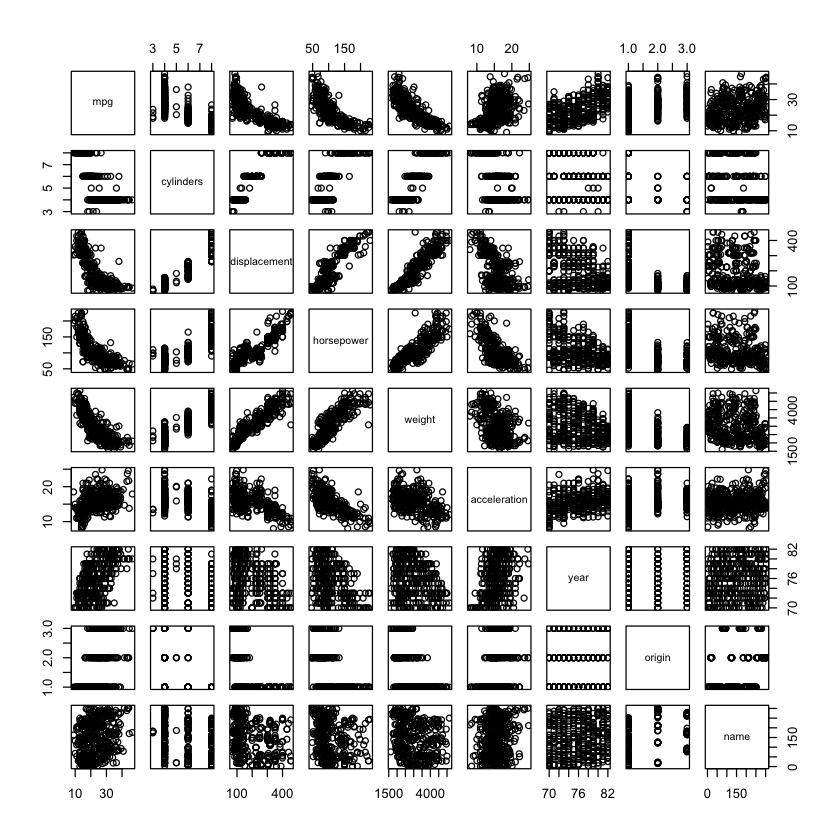

Auto {ISLR},R Documentation


In [7]:
library(ISLR)
help(Auto)
pairs(Auto)

b) Berechnen Sie die Korrelationsmatrix zwischen den Variablen mit `cor()`. Dazu müssen wir zuerst die Variable `name` entfernen, da diese qualitativ ist.

Interpretieren Sie die Werte für `horsepower` und `displacement` mit den Streudiagrammen oben.

In [6]:
cor(Auto[ , -9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


`horsepower` und `displacement` stehen in Zusammenhang. Der Hubraum nimmt mit zunehmenden PS zu.

c) Wir verwenden `lm()` um eine multiple Regression mit der Zielgrösse `mpg` und allen anderen Variablen (ausser `name`) als Prädiktoren durchzuführen. Verwenden Sie wieder Output des `summary()`-Befehls zu interpretieren.

In [8]:
summary(lm(mpg ~., data = Auto[ , -9]))


Call:
lm(formula = mpg ~ ., data = Auto[, -9])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i) Gibt es einen Zusammenhang zwischen den Prädiktoren und der Zielvariable? Begründen Sie dies mit dem $p$-Wert zum $F$-Wert.

Ja, min eine erklärende Variable ist für den Verbrauch pro Meile verantwortlich. Der $p$-Wert liegt unter dem Signifikanzniveaus.

ii) Welche Prädiktoren scheinen statistisch signifikant einen Einfluss auf die Zielvariable zu haben?

Es sind das die Prädikatoren:
* displacement
* weight
* year
* origin

iii) Was deutet der Koeffizient für `year` an?

Je älter das Auto, umso ineffizienter scheint es zu sein.

d) Untersuchen das Modell aus c) noch auf Interaktionseffekte.

In [15]:
fit <- lm(Auto$mpg ~ Auto$weight * Auto$year)
summary(fit)


Call:
lm(formula = Auto$mpg ~ Auto$weight * Auto$year)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0397 -1.9956 -0.0983  1.6525 12.9896 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.105e+02  1.295e+01  -8.531 3.30e-16 ***
Auto$weight            2.755e-02  4.413e-03   6.242 1.14e-09 ***
Auto$year              2.040e+00  1.718e-01  11.876  < 2e-16 ***
Auto$weight:Auto$year -4.579e-04  5.907e-05  -7.752 8.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.193 on 388 degrees of freedom
Multiple R-squared:  0.8339,	Adjusted R-squared:  0.8326 
F-statistic: 649.3 on 3 and 388 DF,  p-value: < 2.2e-16


Der Interaktionstermn ist ungefähr $10^{-14}$, also sehr nahe bei null. Die Nullhypotheses, dass keine Interaktion vorliegt ($\beta_0, \beta_1,...,\beta_n = 0$) wird verworfen. 

> es muss lediglich ein Interaktionsterm geprüft werden, sofern dieser $\neq 0$ ist